In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [3]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [4]:
download(file_path, "newlaptop.csv")
file_name = "newlaptop.csv"

In [5]:
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [7]:
df['Screen_Size_cm'] = np.round(df['Screen_Size_cm'],2)
df.isnull().sum()

Unnamed: 0        0
Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



In [9]:
miss_col = ['Weight_kg', 'Screen_Size_cm']

for i, column in enumerate(miss_col):
    df[column] = df[column].replace(np.nan, df[column].mean(axis=0))

In [10]:
df[['Weight_kg', 'Screen_Size_cm']].dtypes

Weight_kg         float64
Screen_Size_cm    float64
dtype: object

In [19]:
try:
    df['Screen_Size_cm'] = df['Screen_Size_cm'] / 2.54
    df['Weight_kg'] = df['Weight_kg'] / 2.205
    
    df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)
    df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)
except KeyError:
    print("Konversi telah dilakukan")
df.head()

Konversi telah dilakukan


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,0.052135,1.6,8,256,0.013921,978
1,1,Dell,3,Full HD,1,1,3,0.058087,2.0,4,256,0.019141,634
2,2,Dell,3,Full HD,1,1,7,0.058087,2.7,8,256,0.019141,946
3,3,Dell,4,IPS Panel,2,1,5,0.049525,1.6,8,128,0.010615,1244
4,4,HP,4,Full HD,2,1,7,0.058087,1.8,8,256,0.016618,837


In [22]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

Text(0.5, 1.0, 'Price Binning')

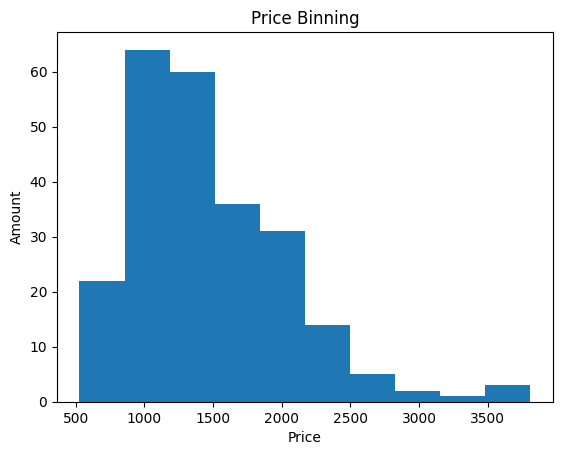

In [30]:

import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["Price"])
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("Amount")
plt.pyplot.title("Price Binning")

In [31]:
bins = np.linspace(min(df['Price']), max(df['Price']), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [32]:
group_names = ["low", "medium", "high"]
group_names

['low', 'medium', 'high']

In [39]:
df['price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)
df[['price-binned', 'Price']].head(100)

,price-binned,Price
0,low,978
1,low,634
2,low,946
3,low,1244
4,low,837
...,...,...
95,low,1142
96,medium,2223
97,low,1396
98,low,697


In [41]:
df['price-binned'].value_counts()

price-binned
low       160
medium     72
high        6
Name: count, dtype: int64

Text(0.5, 0, 'Price Binning')

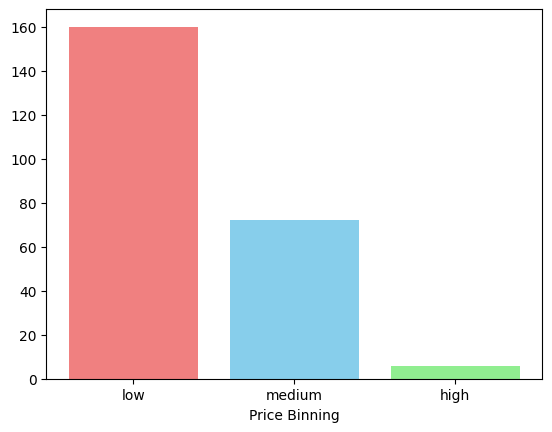

In [44]:
colors = ['lightcoral', 'skyblue', 'lightgreen']
pyplot.bar(group_names, df['price-binned'].value_counts(), color=colors)

plt.pyplot.xlabel("Price")
plt.pyplot.xlabel("Amount")
plt.pyplot.xlabel("Price Binning")

In [47]:
dum_var_1 = pd.get_dummies(df['Screen'])
dum_var_1

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [48]:
dum_var_1.rename(columns={'Full HD': 'Screen-Full_hd', 'IPS Panel': 'Screen-IPS_panel'}, inplace=True)

In [51]:
df.drop('Screen', axis=1, inplace=True)
df = pd.concat([df, dum_var_1], axis=1)

In [52]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,price-binned,Screen-Full_hd,Screen-IPS_panel
0,0,Acer,4,2,1,5,0.052135,0.551724,8,256,0.013921,978,low,False,True
1,1,Dell,3,1,1,3,0.058087,0.689655,4,256,0.019141,634,low,True,False
2,2,Dell,3,1,1,7,0.058087,0.931034,8,256,0.019141,946,low,True,False
3,3,Dell,4,2,1,5,0.049525,0.551724,8,128,0.010615,1244,low,False,True
4,4,HP,4,2,1,7,0.058087,0.620690,8,256,0.016618,837,low,True,False
